In [1]:
import qiime2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import glob
from os import path
from subprocess import PIPE,Popen
%matplotlib inline

In [2]:
!mkdir filtered_tables/16SrRNA filtered_tables/ITS1 

for marker in ['16SrRNA','ITS1']:
    
    inf = 'dada/%s/table.qza' % marker
    tempf = 'filtered_tables/%s/temp.qza' % marker
    outf = 'filtered_tables/%s/filtered_table.qza' % marker
    outf_da = 'filtered_tables/%s/filtered_table.D_VS_A.qza' % marker
    outf_hh = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    outf_hh_v = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qzv' % marker
    outf_hh_4 = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.l4.qza' % marker
    outf_hetro =  'filtered_tables/%s/filtered_table.hetero.qza' % marker
    outf_homo =  'filtered_tables/%s/filtered_table.homo.qza' % marker
    outf_shrub =  'filtered_tables/%s/filtered_table.shrub.qza' % marker
    outf_intershrub =  'filtered_tables/%s/filtered_table.intershrub.qza' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker
    metadata = '%s_metadata.tsv' % marker
    
    !qiime taxa filter-table \
      --i-table $inf \
      --i-taxonomy $taxonomy \
      --p-exclude mitochondria,chloroplast \
      --o-filtered-table $tempf
    
    !qiime feature-table filter-features \
      --i-table $tempf \
      --p-min-frequency 10 \
      --o-filtered-table $tempf
    
    !qiime feature-table filter-features \
      --i-table $tempf \
      --p-min-samples 2 \
      --o-filtered-table $outf
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O'" \
      --o-filtered-table $outf_hh
    
    !qiime feature-table summarize \
      --i-table $outf_hh \
      --o-visualization $outf_hh_v \
      --m-sample-metadata-file $metadata
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='D_VS_L'" \
      --o-filtered-table $outf_da
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Geodiversity]='Heterogenous'" \
      --o-filtered-table $outf_hetro
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Geodiversity]='Homogenous'" \
      --o-filtered-table $outf_homo
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Niche]='Shrub'" \
      --o-filtered-table $outf_shrub
    
    !qiime feature-table filter-samples \
      --i-table $outf \
      --m-metadata-file $metadata \
      --p-where "[Experiment]='H_VS_O' AND [Niche]='Intershrub'" \
      --o-filtered-table $outf_intershrub
    

    !qiime taxa collapse \
      --i-table $outf_hh \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table $outf_hh_4
    

mkdir: cannot create directory ‘filtered_tables/16SrRNA’: File exists
mkdir: cannot create directory ‘filtered_tables/ITS1’: File exists
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/temp.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/temp.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/filtered_table.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/filtered_table.Homo_VS_Hetero.qza
Saved Visualization to: filtered_tables/16SrRNA/filtered_table.Homo_VS_Hetero.qzv
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/filtered_table.D_VS_A.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/filtered_table.hetero.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/filtered_table.homo.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/filtered_table.shrub.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA/filtered_table.intershrub.qza
Saved FeatureTable[Frequency] to: filtered_tables/16SrRNA

In [8]:
narrow = pd.DataFrame(columns = ['marker','taxon','order','Geodiversity','niche','Relative Abundance'])

for marker in ['16SrRNA','ITS1']:
    
    outf_hh_4 = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.l4.qza' % marker
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    
    !qiime feature-table relative-frequency \
        --i-table $outf_hh_4 \
        --o-relative-frequency-table temp.qza
    
    a = qiime2.Artifact.load('temp.qza')
    table = a.view(pd.DataFrame).transpose()
    
    for taxon in table.index.tolist():
        for col in table:
            geo = 'Heterogeneous'
            if metadata.at[col,'Geodiversity'] == 'Homogenous':
                geo = 'Homogeneous'
            niche = metadata.at[col,'Niche']
            narrow.loc[len(narrow)] = [marker,taxon,taxon.split('__')[-1],geo,niche,table.at[taxon,col]]
    
    !rm temp.qza


Saved FeatureTable[RelativeFrequency] to: temp.qza
Saved FeatureTable[RelativeFrequency] to: temp.qza


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

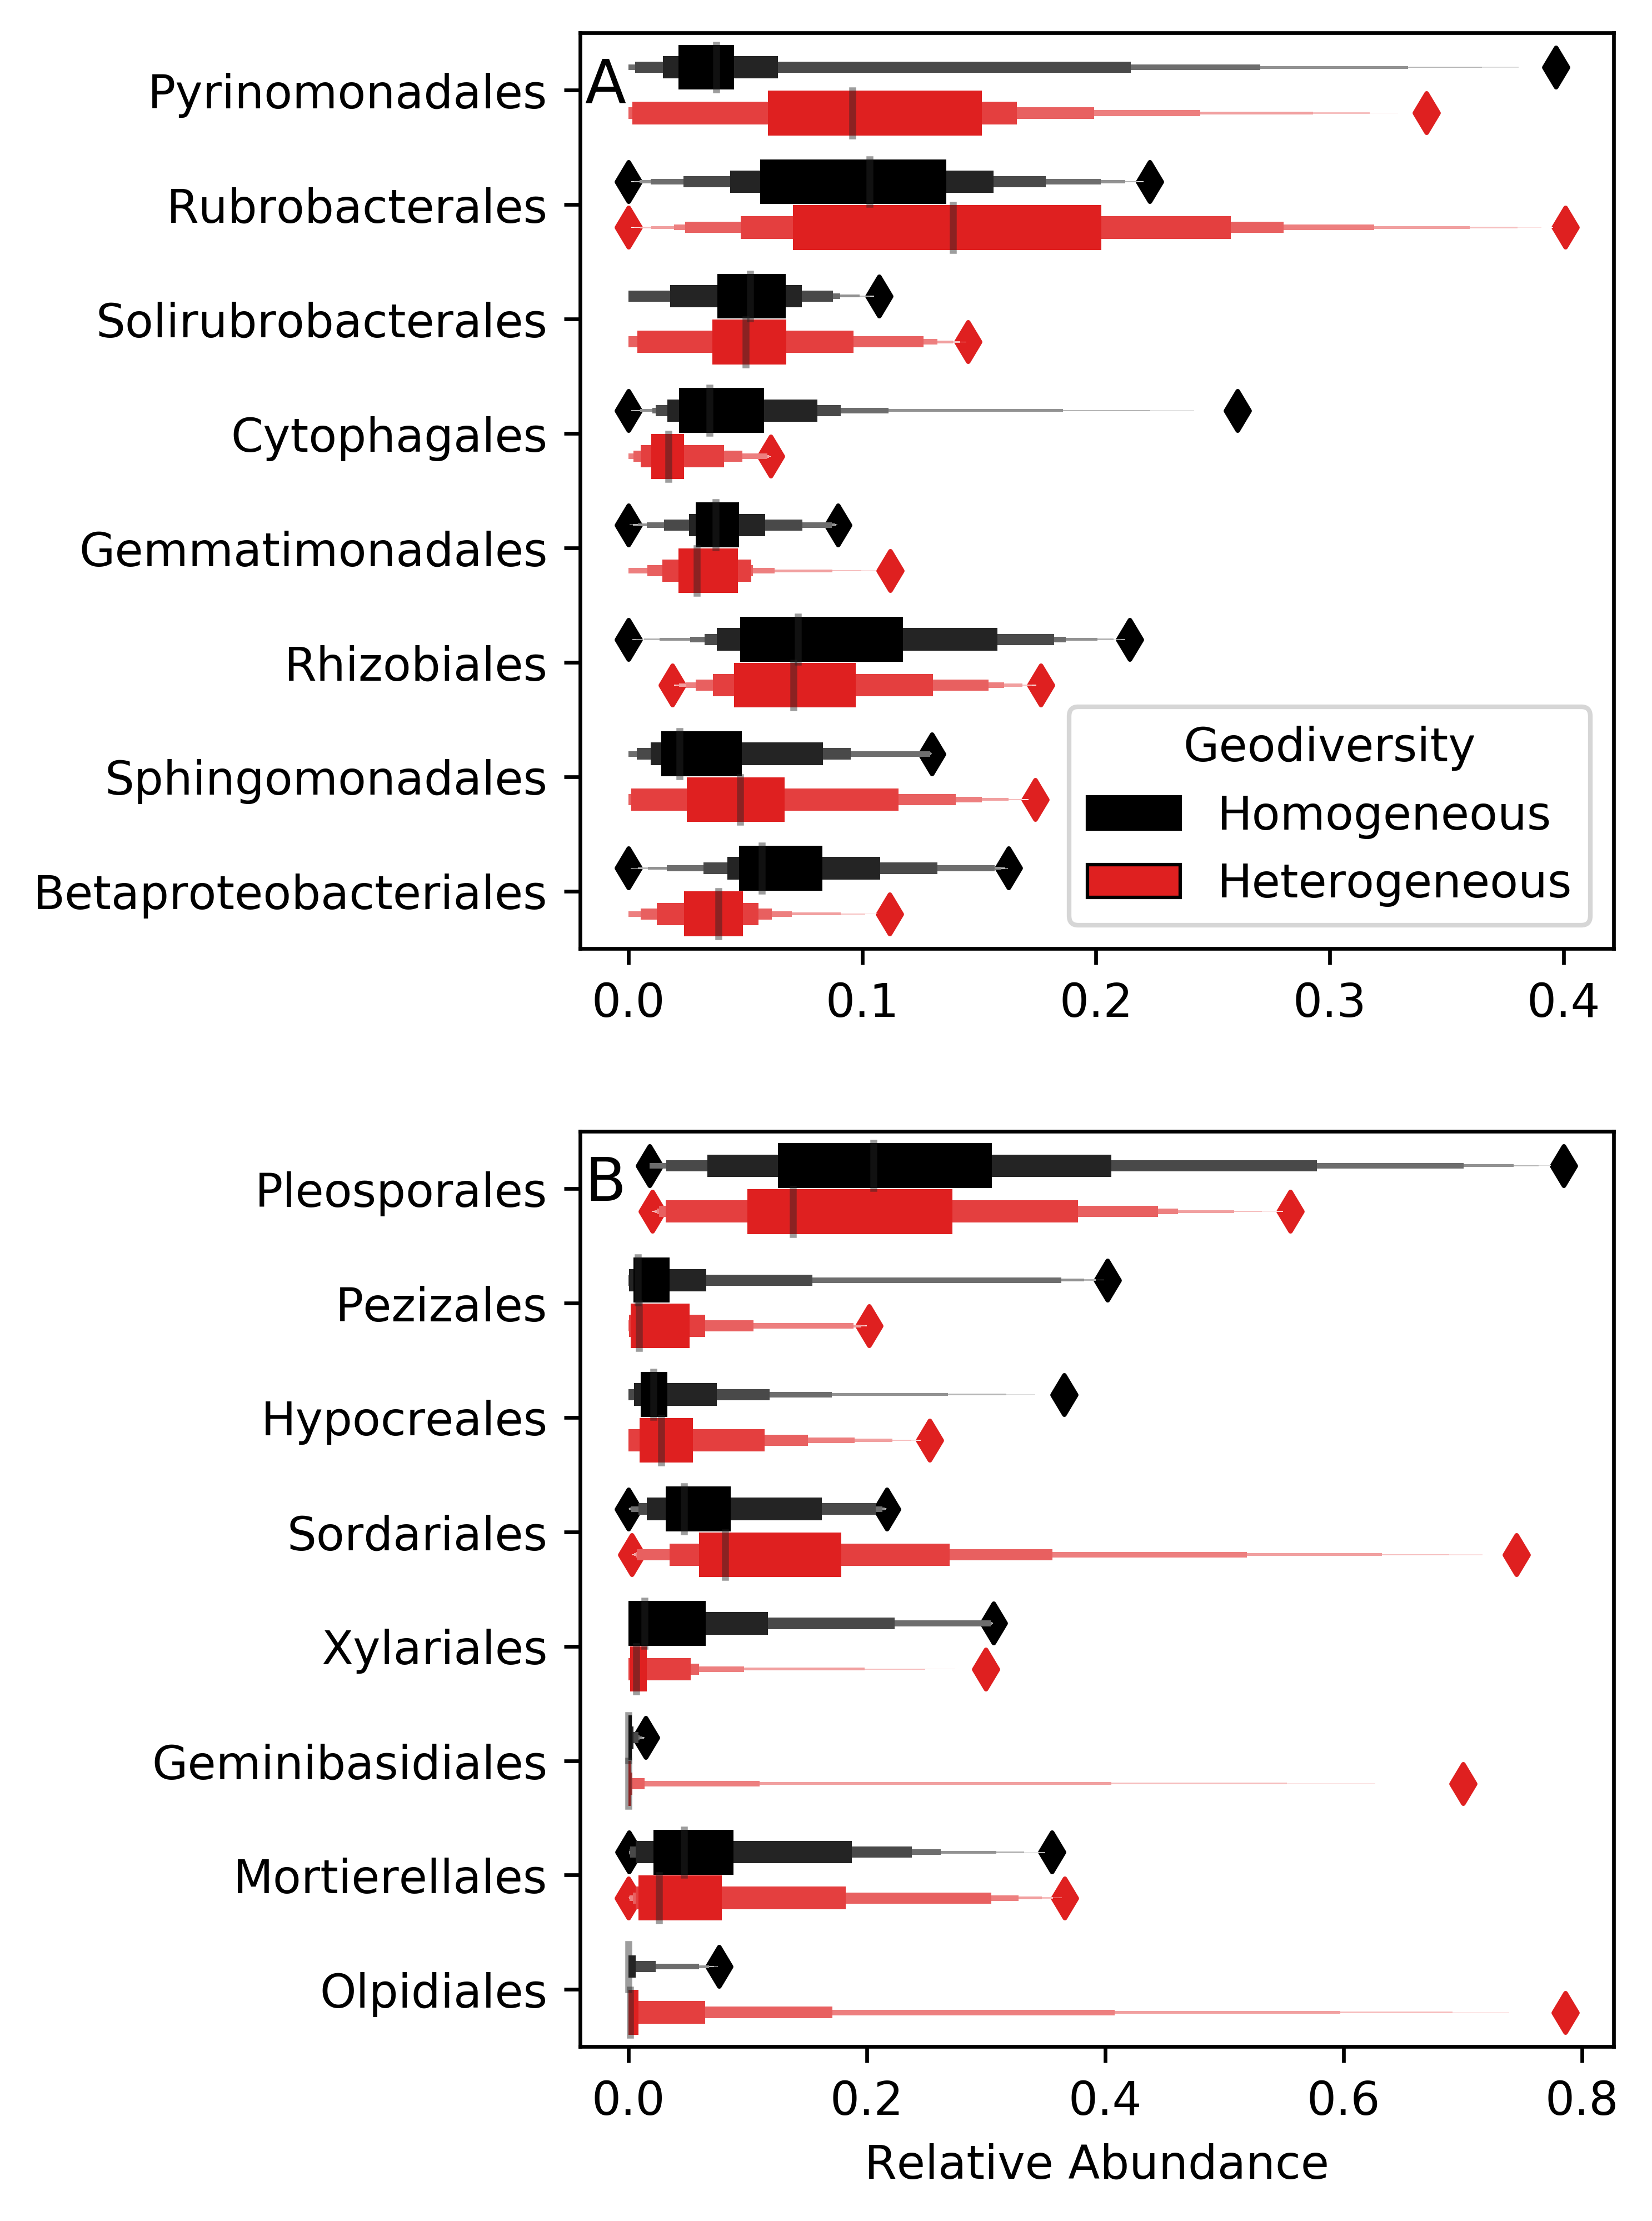

In [9]:
fig, axes = plt.subplots(nrows = 2, dpi=600, figsize=(4,8))
indices = [0,1]
ax_labels = ['A','B']

for marker in ['16SrRNA','ITS1']:
    
    averages = {}

    for order in set(narrow.loc[narrow.marker==marker].order):
        if 'NA' in order:
            continue
        averages[order] = np.average(narrow.loc[narrow.order==order]['Relative Abundance'])
        
        
    top_orders = [i[0] for i in sorted(averages.items(), key=lambda h: h[1], reverse=True)[:8]]
    
    ax = axes[indices.pop(0)]
    
    a = narrow.loc[narrow.order.isin(top_orders)]
    
    a.pivot_table(index=['order','Geodiversity']).to_csv('%s_top_orders.tsv' % marker,sep='\t')
    
    sns.boxenplot(x='Relative Abundance',y='order',data=a,hue='Geodiversity',ax=ax,palette=['black','red'])

    if len(indices) == 0:
        ax.legend().remove()
    else:
        ax.set_xlabel('')
        
    ax.set_ylabel('')
    ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(1,-5),textcoords="offset points",ha="left",va="top",size=13)
plt.savefig('rel_abund.png',bbox_inches='tight')

In [56]:
!mkdir -p bars_and_alpha_rarefaction/16SrRNA bars_and_alpha_rarefaction/ITS1 

for marker in ['16SrRNA','ITS1']:
    
    table = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker
    tree = 'dada/%s/rooted-tree.qza' % marker
    barplot = 'bars_and_alpha_rarefaction/%s/barplot.qza' % marker
    alpha_rarefaction_curve = 'bars_and_alpha_rarefaction/%s/alpha-rarefaction.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    
    !qiime taxa barplot \
      --i-table $table \
      --i-taxonomy $taxonomy \
      --m-metadata-file $metadata \
      --o-visualization $barplot
    
    !qiime diversity alpha-rarefaction \
      --i-table $table \
      --i-phylogeny $tree \
      --p-max-depth 6000 \
      --m-metadata-file $metadata \
      --o-visualization $alpha_rarefaction_curve

Saved Visualization to: bars_and_alpha_rarefaction/16SrRNA/barplot.qza.qzv
Saved Visualization to: bars_and_alpha_rarefaction/16SrRNA/alpha-rarefaction.qzv
Saved Visualization to: bars_and_alpha_rarefaction/ITS1/barplot.qza.qzv
Saved Visualization to: bars_and_alpha_rarefaction/ITS1/alpha-rarefaction.qzv


In [62]:
!mkdir -p diversity

for marker in ['16SrRNA','ITS1']:
    
    depth = 1500
    if marker == 'ITS1':
        depth = 3000
    
    table = 'filtered_tables/%s/filtered_table.qza' % marker
    tree = 'dada/%s/rooted-tree.qza' % marker
    outdir = 'diversity/%s' % marker
    metadata = '%s_metadata.tsv' % marker
    rare_table = 'diversity/%s/rarefied_table.qza' % marker
    pcoa_weighted = 'diversity/%s/weighted_unifrac_pcoa_results.qza' % marker
    pcoa_unweighted = 'diversity/%s/unweighted_unifrac_pcoa_results.qza' % marker
    biplot_weighted = 'diversity/%s/weighted_unifrac_biplot_results.qza' % marker
    biplot_unweighted = 'diversity/%s/unweighted_unifrac_biplot_results.qza' % marker
    
    !qiime diversity core-metrics-phylogenetic \
      --i-phylogeny $tree \
      --i-table $table \
      --p-sampling-depth $depth \
      --m-metadata-file $metadata \
      --output-dir $outdir
    
    !qiime feature-table relative-frequency \
      --i-table $rare_table \
      --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $pcoa_weighted \
      --i-features temp.qza \
      --o-biplot $biplot_weighted
    
    !qiime diversity pcoa-biplot \
      --i-pcoa $pcoa_unweighted \
      --i-features temp.qza \
      --o-biplot $biplot_unweighted

Saved FeatureTable[Frequency] to: diversity/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] % Properties('phylogenetic') to: diversity/16SrRNA/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/16SrRNA/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/16SrRNA/evenness_vector.qza
Saved DistanceMatrix % Properties('phylogenetic') to: diversity/16SrRNA/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix % Properties('phylogenetic') to: diversity/16SrRNA/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: diversity/16SrRNA/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/16SrRNA/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/16SrRNA/jaccard_pcoa_results.qza
Saved PCoAResul

In [3]:
for marker in ['16SrRNA','ITS1']:
    
    for niche in ['shrub','intershrub']:
        
        d = 'diversity_%s' % niche
        
        !mkdir -p $d
    
        depth = 1500
        if marker == 'ITS1':
            depth = 3000

        table = 'filtered_tables/%s/filtered_table.%s.qza' % (marker,niche)
        tree = 'dada/%s/rooted-tree.qza' % marker
        outdir = 'diversity_%s/%s' % (niche,marker)
        metadata = '%s_metadata.tsv' % marker
        rare_table = 'diversity_%s/%s/rarefied_table.qza' % (niche,marker)
        pcoa_weighted = 'diversity_%s/%s/weighted_unifrac_pcoa_results.qza' % (niche,marker)
        pcoa_unweighted = 'diversity_%s/%s/unweighted_unifrac_pcoa_results.qza' % (niche,marker)
        biplot_weighted = 'diversity_%s/%s/weighted_unifrac_biplot_results.qza' % (niche,marker)
        biplot_unweighted = 'diversity_%s/%s/unweighted_unifrac_biplot_results.qza' % (niche,marker)

        !qiime diversity core-metrics-phylogenetic \
          --i-phylogeny $tree \
          --i-table $table \
          --p-sampling-depth $depth \
          --m-metadata-file $metadata \
          --output-dir $outdir

        !qiime feature-table relative-frequency \
          --i-table $rare_table \
          --o-relative-frequency-table temp.qza 

        !qiime diversity pcoa-biplot \
          --i-pcoa $pcoa_weighted \
          --i-features temp.qza \
          --o-biplot $biplot_weighted

        !qiime diversity pcoa-biplot \
          --i-pcoa $pcoa_unweighted \
          --i-features temp.qza \
          --o-biplot $biplot_unweighted

Saved FeatureTable[Frequency] to: diversity_shrub/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] % Properties('phylogenetic') to: diversity_shrub/16SrRNA/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_shrub/16SrRNA/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_shrub/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity_shrub/16SrRNA/evenness_vector.qza
Saved DistanceMatrix % Properties('phylogenetic') to: diversity_shrub/16SrRNA/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix % Properties('phylogenetic') to: diversity_shrub/16SrRNA/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity_shrub/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity_shrub/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: diversity_shrub/16SrRNA/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity_shrub/16SrRNA/weighted_unifrac_pcoa_results.qza
Saved PCoAResu

/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:172: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


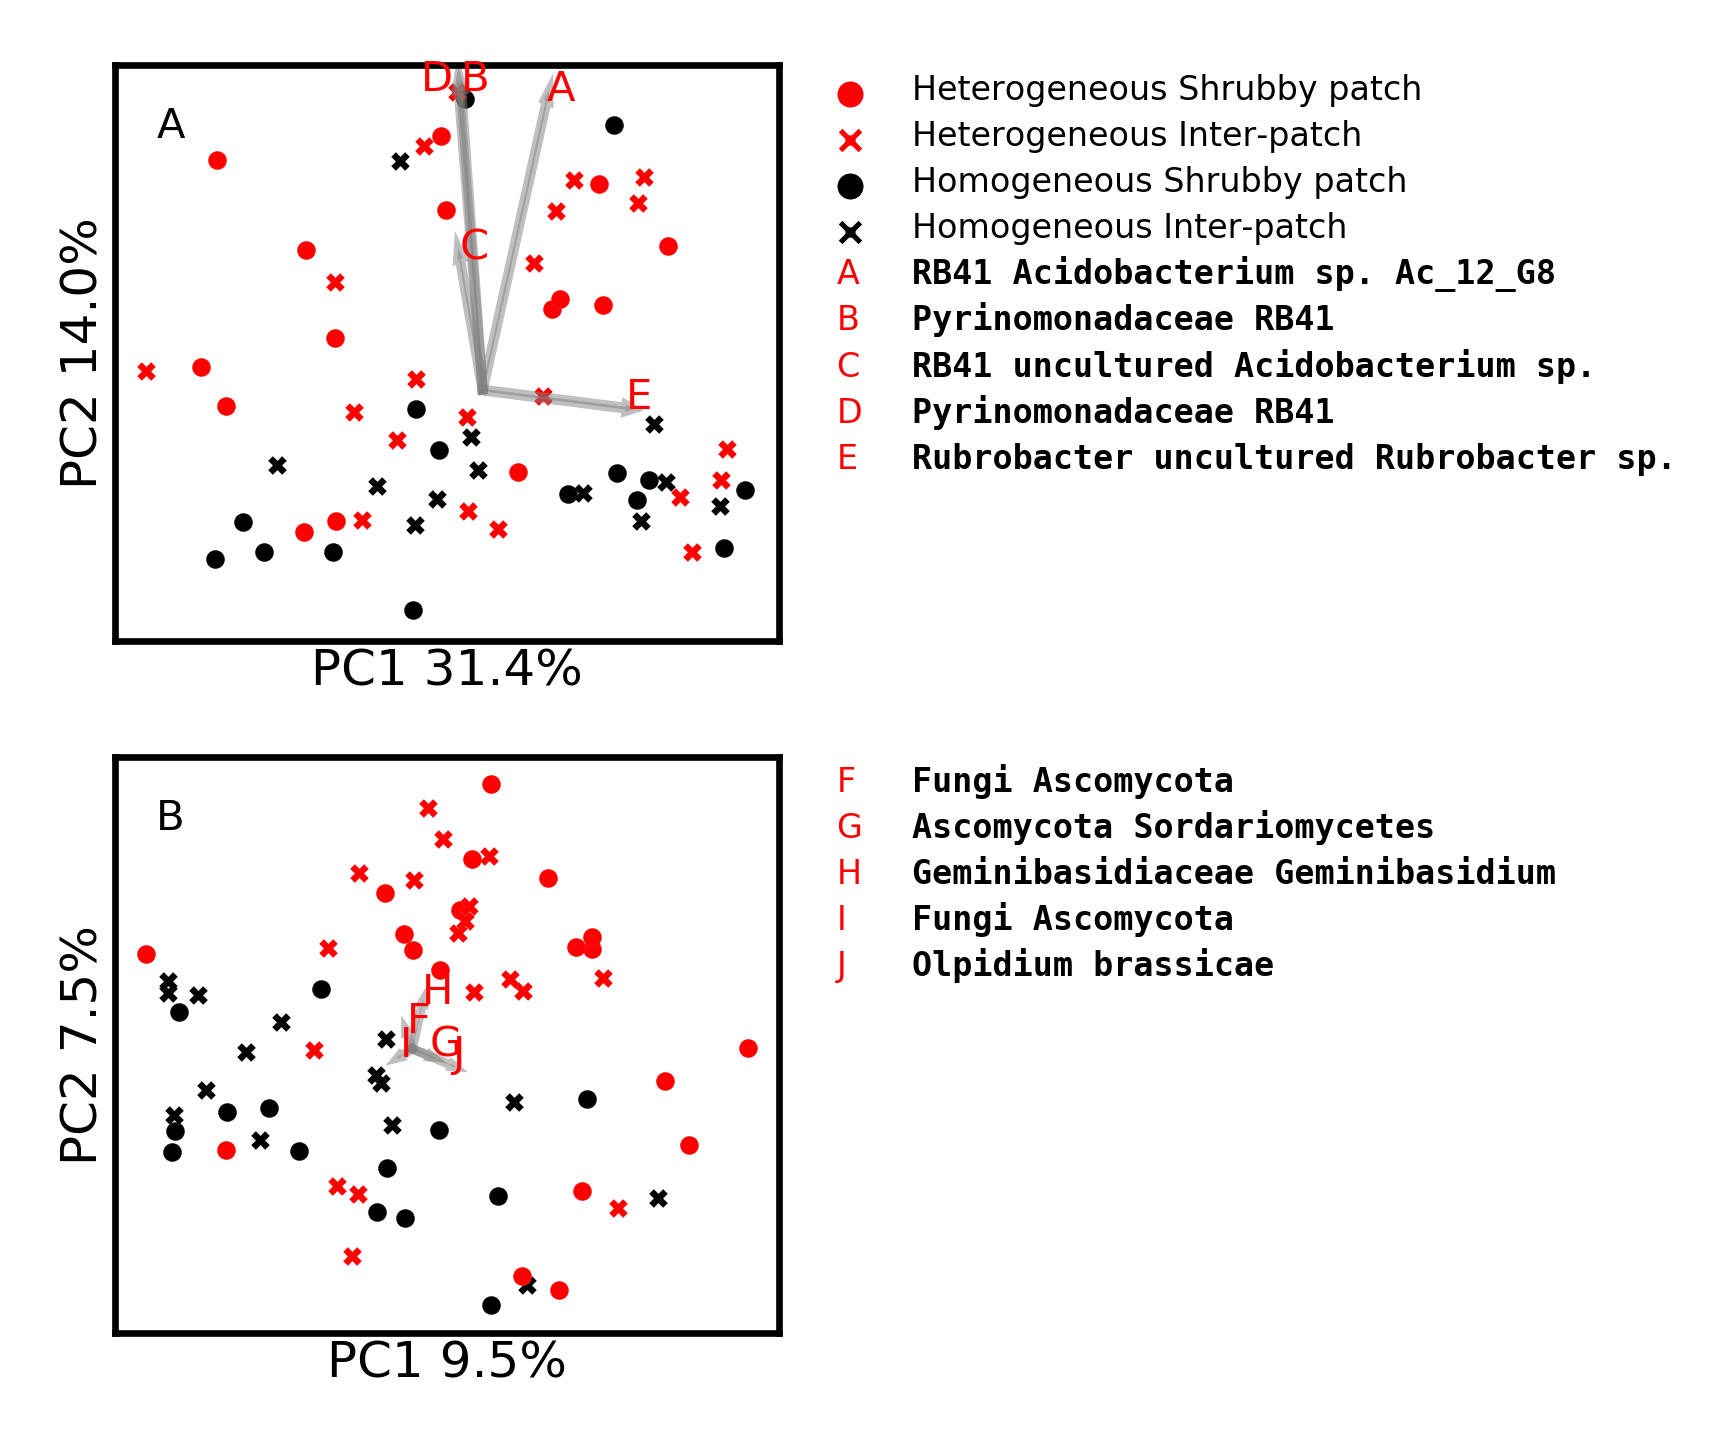

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.spatial.distance import euclidean
%matplotlib inline

def parse_biplot(qza): ### Unzipping qza biplots
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_csv(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None, sep='\t')
    biplot = pd.read_csv(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None, sep='\t')
    nan_cols = []
    for col in biplot:
        if np.isnan(biplot[col].tolist()[0]):
            nan_cols.append(col)
    if len(nan_cols) > 0:
        biplot = biplot.drop(labels=nan_cols,axis=1)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords(axis,axis2,num,biplot): ### Geting coordinats for arrows
    arrow_data = []
    origin = np.zeros_like(biplot.columns)
    biplot['importance'] = biplot.apply(euclidean, axis=1, args=(origin,))
    biplot.sort_values('importance', inplace=True, ascending=False)
    for taxon in biplot.index.tolist()[:num].copy():
        arrow_data.append([taxon,biplot.at[taxon,axis],biplot.at[taxon,axis2]])
    return arrow_data

colora = {
    'Heterogenous': 'red',
    'Homogenous': 'black',
}

marka = {
    'Shrub': 'o',
    'Intershrub': 'X'
}

def sub(ordination,metadata,ax):
    for geo in set(metadata.Geodiversity):
        for niche in set(metadata.Niche):
            color = colora[geo]
            marker = marka[niche]
            size = 5
            data = ordination.loc[
                ordination.index.isin(metadata.loc[
                    ((metadata.Niche == niche) & (metadata.Geodiversity == geo))
                ].index)
            ]
            sns.scatterplot(x=x,y=y,
                            data=data,
                            ax=ax,
                            legend=False,
                            color=color,
                            marker=marker,
                            s=size,
                            linewidth=0.01)


z=5 ### Number of features to plot

fig=plt.figure(constrained_layout=True,dpi=600,figsize=(2,2.8))
fig.set_constrained_layout_pads(w_pad=0, h_pad=0)
gs = GridSpec(2, 2, width_ratios=[3, 1], wspace=0.1)
axes = []
for ax in gs:
    axes.append(fig.add_subplot(ax))
    
j=0

letter = 'a'
ax_labels = ['A','B']

for marker in ['16SrRNA','ITS1']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, sep='\t', index_col=0)
    qza = 'dada/%s/taxonomy.qza' % marker
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/taxonomy.tsv'
    taxa = pd.read_csv(inf,index_col=0,sep='\t')
    !rm -r $digest
    for unifrac in ['weighted_unifrac','unweighted_unifrac']:
        if marker == '16SrRNA' and unifrac == 'unweighted_unifrac':
            continue
        if marker == 'ITS1' and unifrac == 'weighted_unifrac':
            continue
        qza = 'diversity/%s/%s_biplot_results.qza' % (marker,unifrac)
        ordination, biplot, Eigvals, Proportion = parse_biplot(qza)
        
        x=1 ### axis to show
        y=2 ### axis to show
        ax = axes[j]
        j+=1
        sub(ordination,metadata,ax)
        
        ylim = ax.get_ylim()

        arrow_data = get_arrow_coords(x,y,z,biplot)
        arrow_labels_legend = {}

        
        for arrow in arrow_data:
            arrow_x,text_x = arrow[1],arrow[1]
            arrow_y, text_y = arrow[2], arrow[2]
            if arrow[2] > ylim[1]:
                arrow_y, text_y = ylim[1]-0.01, ylim[1]-0.01
            ax.arrow(0, 0, arrow_x, arrow_y, fc='gray',ec='gray',alpha=0.5)
            t = taxa.at[arrow[0],'Taxon'].split(';')[-1]
            k = -2
            while t=='NA':
                t = taxa.at[arrow[0],'Taxon'].split(';')[k]
                k-=1
            T = taxa.at[arrow[0],'Taxon'].split(';')[k].split('__')[1] + ' '+t.split('__')[1]
            arrow_labels_legend[letter.upper()] = T
            if letter == 'd':
                text_x -= 0.02
            ax.text(text_x, text_y, letter.upper(), fontdict={'fontsize': 5, 'color':'red'})
            letter = chr(ord(letter) + 1)

        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[y-1]*100.0),fontdict={'fontsize': 6})
        ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[x-1]*100.0),fontdict={'fontsize': 6})
        ax.xaxis.set_label_coords(0.5, -0.01)
        ax.yaxis.set_label_coords(-0.01, 0.5)
        ax.autoscale(enable=True, axis='both', tight=None)
        ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=5)
        #ax.set_xlim(-0.225,0.21)

        ax = axes[j]
        j+=1
        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylim(0,1)
        ax.set_xlim(0,0.25)

        legend = sorted(list(arrow_labels_legend.items()))
        y = 0.95
        for c in colora:
            if marker=='ITS1':
                continue
            for m in marka:
                sns.scatterplot([0.03],[y],marker=marka[m],color=colora[c],ax=ax,s=15,legend=False)
                text = 'Heterogeneous'
                if c == 'Homogenous':
                    text = 'Homogeneous'
                n = 'Inter-patch'
                if m == 'Shrub':
                    n = 'Shrubby patch'
                ax.text(0.1,y-0.01,"%s %s" % (text,n),fontdict={'size':4})
                y -= 0.08
        for i in legend:
            ax.text(0.015,y-0.01,i[0],fontdict={'size':4,'color':'red'})
            asv = i[1]
            ax.text(0.1,y-0.01,asv,fontdict={'size':4,'family':'monospace','weight':'semibold'})
            y -= 0.08

        for a in ['top','bottom','left','right']:
            ax.spines[a].set_visible(False)
plt.savefig('PCoA.png',bbox_inches='tight')

In [18]:
!mkdir -p group_significance_alpha/16SrRNA group_significance_alpha/ITS1 

for marker in ['16SrRNA','ITS1']:
    for alpha in ['faith_pd','shannon','observed_otus']:

        vector = 'diversity/%s/%s_vector.qza' % (marker,alpha)
        outf = 'group_significance_alpha/%s/%s_results.qzv' % (marker,alpha)
        metadata = '%s_metadata.tsv' % marker

        !qiime diversity alpha-group-significance \
          --i-alpha-diversity $vector \
          --m-metadata-file $metadata \
          --o-visualization $outf

Saved Visualization to: group_significance_alpha/16SrRNA/faith_pd_results.qzv
Saved Visualization to: group_significance_alpha/16SrRNA/shannon_results.qzv
Saved Visualization to: group_significance_alpha/16SrRNA/observed_otus_results.qzv
Saved Visualization to: group_significance_alpha/ITS1/faith_pd_results.qzv
Saved Visualization to: group_significance_alpha/ITS1/shannon_results.qzv
Saved Visualization to: group_significance_alpha/ITS1/observed_otus_results.qzv


In [4]:
for marker in ['16SrRNA','ITS1']:
    for niche in ['shrub','intershrub']:
        d = "group_significance_alpha_%s/%s" % (niche,marker)
        !mkdir -p $d
        for alpha in ['faith_pd','shannon','observed_otus']:

            vector = 'diversity_%s/%s/%s_vector.qza' % (niche,marker,alpha)
            outf = 'group_significance_alpha_%s/%s/%s_results.qzv' % (niche,marker,alpha)
            metadata = '%s_metadata.tsv' % marker

            !qiime diversity alpha-group-significance \
              --i-alpha-diversity $vector \
              --m-metadata-file $metadata \
              --o-visualization $outf

Saved Visualization to: group_significance_alpha_shrub/16SrRNA/faith_pd_results.qzv
Saved Visualization to: group_significance_alpha_shrub/16SrRNA/shannon_results.qzv
Saved Visualization to: group_significance_alpha_shrub/16SrRNA/observed_otus_results.qzv
Saved Visualization to: group_significance_alpha_intershrub/16SrRNA/faith_pd_results.qzv
Saved Visualization to: group_significance_alpha_intershrub/16SrRNA/shannon_results.qzv
Saved Visualization to: group_significance_alpha_intershrub/16SrRNA/observed_otus_results.qzv
Saved Visualization to: group_significance_alpha_shrub/ITS1/faith_pd_results.qzv
Saved Visualization to: group_significance_alpha_shrub/ITS1/shannon_results.qzv
Saved Visualization to: group_significance_alpha_shrub/ITS1/observed_otus_results.qzv
Saved Visualization to: group_significance_alpha_intershrub/ITS1/faith_pd_results.qzv
Saved Visualization to: group_significance_alpha_intershrub/ITS1/shannon_results.qzv
Saved Visualization to: group_significance_alpha_inters

### Beta diversity test
Within and amnong niches within geodiversity classes

In [12]:
import pandas as pd
from scipy.stats import mannwhitneyu as mwu
from statsmodels.stats.multitest import multipletests

def distance_matrix(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/distance-matrix.tsv'
    matrix = pd.read_csv(inf,sep='\t',index_col=0)
    !rm -r $digest
    return matrix

narrow  = pd.DataFrame(columns = ['metric','marker','slope','geodiversity','a','b','niche_a','niche_b','within/among','distance'])

for marker in ['ITS1','16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    metadata = metadata.loc[metadata.Experiment == 'H_VS_O']
    for metric in ['weighted','unweighted']:
        matrix = distance_matrix('diversity/%s/%s_unifrac_distance_matrix.qza' % (marker,metric))
        samples = metadata.index.tolist()
        samples = [i for i in samples if i in matrix.index.tolist()]
        for i in range(len(samples)):
            for j in range(i+1,len(samples)):
                a = samples[i]
                b = samples[j]
                slope_a = metadata.at[a,'TubePartA_slope_or_plant']
                slope_b = metadata.at[b,'TubePartA_slope_or_plant']
                if slope_a != slope_b:
                    continue
                if metadata.at[a,'Geodiversity'] == 'Homogenous':
                    geodiversity = 'Homogeneous'
                else:
                    geodiversity = 'Heterogeneous'
                niche_a = metadata.at[a,'Niche']
                niche_b = metadata.at[b,'Niche']
                within = None
                if niche_a == niche_b:
                    within = 'within niche'
                else:
                    within = 'among niches'
                distance = matrix.at[a,b]
                narrow.loc[len(narrow)] = [metric,marker,slope_a,geodiversity,a,niche_a,b,niche_b,within,distance]
            
mwu_results = pd.DataFrame(columns = ['metric','marker','geodiversity','u','p'])

for marker in ['16SrRNA','ITS1']:
    for geo in ['Homogenous','Heterogenous']:
        for metric in ['weighted','unweighted']:
            within = narrow.loc[((narrow.metric==metric) & (narrow.marker==marker) & (narrow.geodiversity==geo) & (narrow['within/among'] == 'within niche'))]['distance'].tolist()
            among = narrow.loc[((narrow.metric==metric) & (narrow.marker==marker) & (narrow.geodiversity==geo) & (narrow['within/among'] == 'among niches'))]['distance'].tolist()
            u,p=mwu(within,among)
            mwu_results.loc[len(mwu_results)] = [metric,marker,geo,u,p]
        
mwu_results['q'] = list(multipletests(mwu_results.p, method='fdr_bh'))[1]

/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/scipy/stats/stats.py:5700: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


In [13]:
mwu_results.to_csv('mann_whitney_within_and_among_niches_unifrac.tsv',sep='\t')

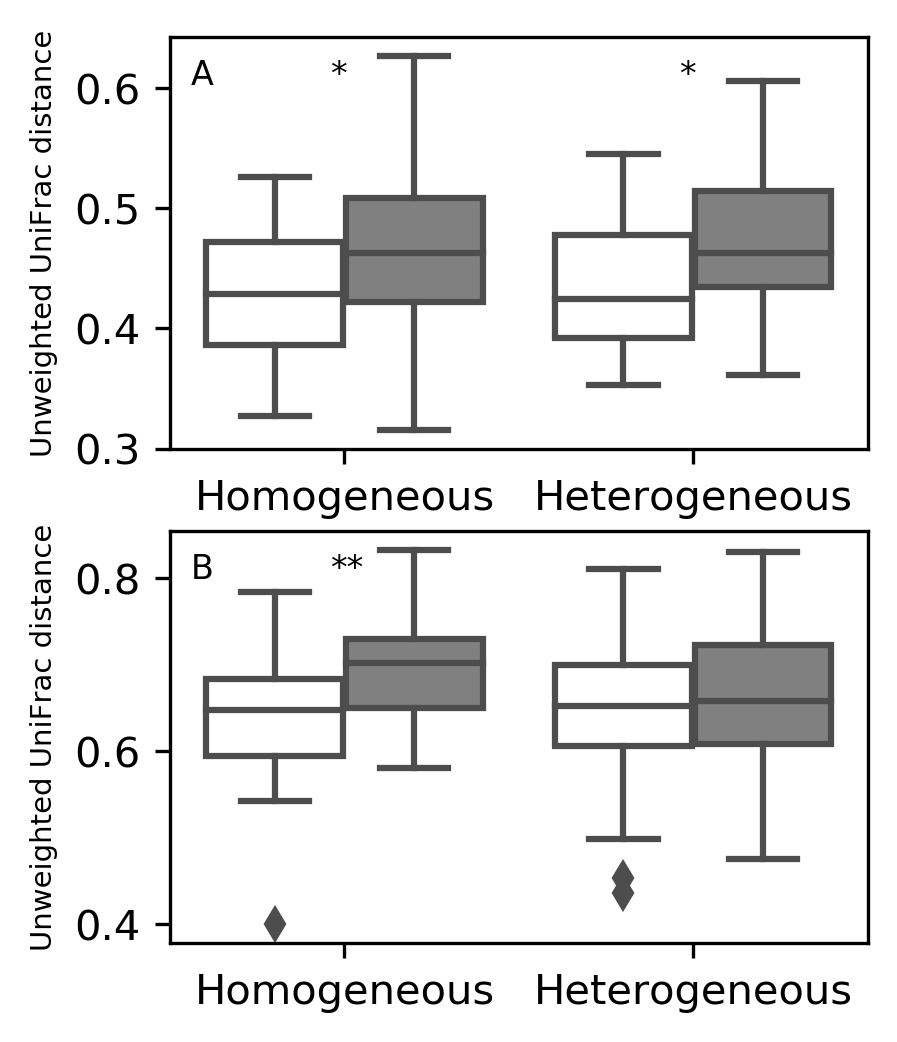

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axes = plt.subplots(nrows=2,dpi=300,figsize=(3,4))

sns.boxplot(x='geodiversity',y='distance',hue='within/among',data=narrow.loc[((narrow.marker=='16SrRNA') & (narrow.metric=='unweighted'))],ax=axes[0],palette=['white','gray'])
sns.boxplot(x='geodiversity',y='distance',hue='within/among',data=narrow.loc[((narrow.marker=='ITS1') & (narrow.metric=='unweighted'))],ax=axes[1],palette=['white','gray'])
for ax in axes:
    ax.legend().remove()
    ax.set_ylabel('Unweighted UniFrac distance', fontdict={'size':7})
    ax.set_xlabel('')
axes[0].annotate("A",xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=8)
axes[1].annotate("B",xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=8)
axes[0].annotate("*",xy=(0.2,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=8)
axes[0].annotate("*",xy=(0.7,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=8)
axes[1].annotate("**",xy=(0.2,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=8)

fig.savefig('unifrac_distances.png',bbox_inches='tight')

### Beta diversity test
Within and among biodiversity classes  
Distances between samples from the same slope were excluded

In [69]:
import pandas as pd
from scipy.stats import mannwhitneyu as mwu
from statsmodels.stats.multitest import multipletests

def distance_matrix(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/distance-matrix.tsv'
    matrix = pd.read_csv(inf,sep='\t',index_col=0)
    !rm -r $digest
    return matrix

narrow  = pd.DataFrame(columns = ['metric','marker','a','b','slope_a','geodiversity_a','slope_b','geodiversity_b','within/among','distance'])

for marker in ['ITS1','16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    metadata = metadata.loc[metadata.Experiment == 'H_VS_O']
    for metric in ['weighted','unweighted']:
        matrix = distance_matrix('diversity/%s/%s_unifrac_distance_matrix.qza' % (marker,metric))
        samples = metadata.index.tolist()
        samples = [i for i in samples if i in matrix.index.tolist()]
        for i in range(len(samples)):
            for j in range(i+1,len(samples)):
                a = samples[i]
                b = samples[j]
                slope_a = metadata.at[a,'TubePartA_slope_or_plant']
                slope_b = metadata.at[b,'TubePartA_slope_or_plant']
                if slope_a == slope_b:
                    continue
                geodiversity_a = metadata.at[a,'Geodiversity']
                geodiversity_b = metadata.at[b,'Geodiversity']
                within = None
                if geodiversity_a == geodiversity_b:
                    within = 'within geodiversity'
                else:
                    within = 'among geodiversity'
                distance = matrix.at[a,b]
                narrow.loc[len(narrow)] = [metric,marker,a,b,slope_a,geodiversity_a,slope_b,geodiversity_b,within,distance]
            
mwu_results = pd.DataFrame(columns = ['metric','marker','u','p'])

for marker in ['16SrRNA','ITS1']:
    for metric in ['weighted','unweighted']:
        within = narrow.loc[((narrow.metric==metric) & (narrow.marker==marker) & (narrow['within/among'] == 'within geodiversity'))]['distance'].tolist()
        among = narrow.loc[((narrow.metric==metric) & (narrow.marker==marker) & (narrow['within/among'] == 'among geodiversity'))]['distance'].tolist()
        u,p=mwu(within,among)
        mwu_results.loc[len(mwu_results)] = [metric,marker,u,p]
        
mwu_results['q'] = list(multipletests(mwu_results.p, method='fdr_bh'))[1]

In [125]:
mwu_results.to_csv('mann_whitney_within_and_among_geodiversity_unifrac.tsv',sep='\t')

### Alpha diversity test
Between niches within biodiversity classes

In [126]:
import pandas as pd
from scipy.stats import mannwhitneyu as mwu
from statsmodels.stats.multitest import multipletests

def faith_pd_vector(qza):
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/alpha-diversity.tsv'
    faith_pd_all = pd.read_csv(inf,index_col=0,sep='\t')
    !rm -r $digest
    return faith_pd_all

narrow  = pd.DataFrame(columns = ['marker','slope','sample','geodiversity','niche','faith_pd'])

for marker in ['ITS1','16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, index_col=0,sep='\t')
    metadata = metadata.loc[metadata.Experiment == 'H_VS_O']
    vector = faith_pd_vector('diversity/%s/faith_pd_vector.qza' % marker)
    samples = metadata.index.tolist()
    samples = [i for i in samples if i in vector.index.tolist()]
    for smpl in samples:
        slope = metadata.at[smpl,'TubePartA_slope_or_plant']
        geodiversity = metadata.at[smpl,'Geodiversity']
        niche = metadata.at[smpl,'Niche']
        faith_pd = vector.at[smpl,'faith_pd']
        narrow.loc[len(narrow)] = [marker,slope,smpl,geodiversity,niche,faith_pd]
            
mwu_results = pd.DataFrame(columns = ['marker','geodiversity','u','p'])

for marker in ['16SrRNA','ITS1']:
    for geo in ['Homogenous','Heterogenous']:
            shrub = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity==geo) & (narrow.niche == 'Shrub'))]['faith_pd'].tolist()
            inter = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity==geo) & (narrow.niche == 'Intershrub'))]['faith_pd'].tolist()
            u,p=mwu(shrub,inter)
            mwu_results.loc[len(mwu_results)] = [marker,geo,u,p]
        
mwu_results['q'] = list(multipletests(mwu_results.p, method='fdr_bh'))[1]

In [119]:
mwu_results.to_csv('mann_whitney_between_niches_faith_pd.tsv',sep='\t')

### Alpha diversity test
Between geodiversity classes

In [128]:
log = open('mann_whitney_between_geodiversity_classes_faith_pd.tsv','wt')
for marker in ['16SrRNA','ITS1']:
    homo = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity=='Homogenous'))]['faith_pd'].tolist()
    hetero = narrow.loc[((narrow.marker==marker) & (narrow.geodiversity=='Heterogenous'))]['faith_pd'].tolist()
    u,p=mwu(homo,hetero)
    print(marker,u,p)
    log.write('%s\t%.7f\t%.7f\n' % (marker,u,p))
log.close()

16SrRNA 148.0 0.00015735332347834063
ITS1 376.0 0.40285679813398884


### Ancom

In [97]:

for marker in ['16SrRNA','ITS1']:
    
    outdir = 'ancom/%s' % marker
    !mkdir -p $outdir
    
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    table_Hetro = 'filtered_tables/%s/filtered_table.hetero.qza' % marker
    table_Homo = 'filtered_tables/%s/filtered_table.homo.qza' % marker
    ancom_H_vs_H = 'ancom/%s/ancom_H_vs_H.qzv' % marker
    ancom_Hetro = 'ancom/%s/ancom_Hetro.qzv' % marker
    ancom_Homo = 'ancom/%s/ancom_Homo.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker

    !qiime taxa collapse \
      --i-table $table_H_vs_H \
      --i-taxonomy $taxonomy \
      --p-level 6 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Geodiversity \
      --o-visualization $ancom_H_vs_H
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Hetro \
      --i-taxonomy $taxonomy \
      --p-level 6 \
      --o-collapsed-table temp.qza
    
    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Hetro
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Homo \
      --i-taxonomy $taxonomy \
      --p-level 6 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Homo
    
    !rm temp.qza

Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/16SrRNA/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/16SrRNA/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/16SrRNA/ancom_Homo.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/ITS1/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/ITS1/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom/ITS1/ancom_Homo.qzv


In [96]:

for marker in ['16SrRNA','ITS1']:
    
    outdir = 'ancom_l4/%s' % marker
    !mkdir -p $outdir
    
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    table_Hetro = 'filtered_tables/%s/filtered_table.hetero.qza' % marker
    table_Homo = 'filtered_tables/%s/filtered_table.homo.qza' % marker
    ancom_H_vs_H = 'ancom_l4/%s/ancom_H_vs_H.qzv' % marker
    ancom_Hetro = 'ancom_l4/%s/ancom_Hetro.qzv' % marker
    ancom_Homo = 'ancom_l4/%s/ancom_Homo.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker

    !qiime taxa collapse \
      --i-table $table_H_vs_H \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Geodiversity \
      --o-visualization $ancom_H_vs_H
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Hetro \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table temp.qza
    
    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Hetro
    
    !rm temp.qza

    !qiime taxa collapse \
      --i-table $table_Homo \
      --i-taxonomy $taxonomy \
      --p-level 4 \
      --o-collapsed-table temp.qza

    !qiime composition add-pseudocount \
      --i-table temp.qza \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Homo
    
    !rm temp.qza

Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/16SrRNA/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/16SrRNA/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/16SrRNA/ancom_Homo.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/ITS1/ancom_H_vs_H.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/ITS1/ancom_Hetro.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_l4/ITS1/ancom_Homo.qzv


In [73]:
for marker in ['16SrRNA','ITS1']:
    
    outdir = 'ancom_asvs/%s' % marker
    !mkdir -p $outdir
    
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    table_Hetro = 'filtered_tables/%s/filtered_table.hetero.qza' % marker
    table_Homo = 'filtered_tables/%s/filtered_table.homo.qza' % marker
    ancom_H_vs_H = 'ancom_asvs/%s/ancom_H_vs_H.qzv' % marker
    ancom_Hetro = 'ancom_asvs/%s/ancom_Hetro.qzv' % marker
    ancom_Homo = 'ancom_asvs/%s/ancom_Homo.qzv' % marker
    metadata = '%s_metadata.tsv' % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker

    !qiime composition add-pseudocount \
      --i-table $table_H_vs_H \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Geodiversity \
      --o-visualization $ancom_H_vs_H
    
    !rm temp.qza

    !qiime composition add-pseudocount \
      --i-table $table_Hetro \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Hetro
    
    !rm temp.qza

    !qiime composition add-pseudocount \
      --i-table $table_Homo \
      --o-composition-table temp.qza

    !qiime composition ancom \
      --i-table temp.qza \
      --m-metadata-file $metadata \
      --m-metadata-column Niche \
      --o-visualization $ancom_Homo
    
    !rm temp.qza

Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/16SrRNA/ancom_H_vs_H.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/16SrRNA/ancom_Hetro.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/16SrRNA/ancom_Homo.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/ITS1/ancom_H_vs_H.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/ITS1/ancom_Hetro.qzv
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_asvs/ITS1/ancom_Homo.qzv


In [119]:


for marker in ['16SrRNA','ITS1']:
    ouf = 'ancom_slops/%s' % marker
    !mkdir -p $ouf
    metadata = "%s_metadata.tsv" % marker
    taxonomy = 'dada/%s/taxonomy.qza' % marker
    m = pd.read_csv(metadata,sep='\t',index_col=0)
    table_H_vs_H = 'filtered_tables/%s/filtered_table.Homo_VS_Hetero.qza' % marker
    
    for slope in set(m.TubePartA_slope_or_plant):
        
        if len(m.loc[m.TubePartA_slope_or_plant==slope].index) < 8:
            continue
            
        ancom = 'ancom_slops/%s/ancom_%s.qzv' % (marker,slope)
        
        cline = 'qiime feature-table filter-samples '
        cline += '--i-table %s --m-metadata-file %s '
        cline += '--p-where "[TubePartA_slope_or_plant]=\'%s\'" '
        cline += '--o-filtered-table temp.qza' 
        cline = cline% (table_H_vs_H,metadata,slope)
        
        p = Popen(cline, shell=True,stdout=PIPE,stderr=PIPE)
        out, err = p.communicate()

        !qiime taxa collapse \
          --i-table temp.qza \
          --i-taxonomy $taxonomy \
          --p-level 6 \
          --o-collapsed-table temp.qza

        !qiime composition add-pseudocount \
          --i-table temp.qza \
          --o-composition-table temp.qza

        !qiime composition ancom \
          --i-table temp.qza \
          --m-metadata-file $metadata \
          --m-metadata-column Niche \
          --o-visualization $ancom

        !rm temp.qza
        
        

Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_O2.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_H2.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_O3.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_H3.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_O1.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/16SrRNA/ancom_H1.qzv
Saved FeatureTable[Frequency] to: temp.qza
Saved FeatureTable[Composition] to: temp.qza
Saved Visualization to: ancom_slops/ITS1/a

In [77]:
import pandas as pd

!mkdir picrust/diversity

for marker in ['16SrRNA','ITS1']:
    
    pathways = 'picrust/%s/output/pathways_out/path_abun_unstrat.tsv.gz' % marker
    pathways_biom =  'picrust/%s/output/pathways_out/path_abun_unstrat.biom' % marker
    pathways_qza =  'picrust/%s/output/pathways_out/path_abun_unstrat.qza' % marker
    metadata = "%s_metadata.tsv" % marker
    outdir = 'picrust/diversity/%s' % marker
    rare_tab = 'picrust/diversity/%s/rarefied_table.qza' % marker
    bc_pcoa = 'picrust/diversity/%s/bray_curtis_pcoa_results.qza' % marker
    bc_biplot = 'picrust/diversity/%s/bray_curtis_biplot_results.qza' % marker
    j_pcoa = 'picrust/diversity/%s/jaccard_pcoa_results.qza' % marker
    j_biplot = 'picrust/diversity/%s/jaccard_biplot_results.qza' % marker
    
    !biom convert \
        -i $pathways \
        -o $pathways_biom \
        --table-type="OTU table" \
        --to-hdf5
    
    !qiime tools import \
      --input-path $pathways_biom \
      --type 'FeatureTable[Frequency]' \
      --input-format BIOMV210Format \
      --output-path $pathways_qza
    
    !qiime diversity core-metrics \
      --i-table $pathways_qza \
      --p-sampling-depth 2000 \
      --m-metadata-file $metadata \
      --output-dir $outdir

    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $bc_pcoa \
      --i-features temp.qza \
      --o-biplot $bc_biplot

    !rm temp.qza
    
    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $j_pcoa \
      --i-features temp.qza \
      --o-biplot $j_biplot

!rm temp.qza

Imported picrust/16SrRNA/output/pathways_out/path_abun_unstrat.biom as BIOMV210Format to picrust/16SrRNA/output/pathways_out/path_abun_unstrat.qza
Saved FeatureTable[Frequency] to: picrust/diversity/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/evenness_vector.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/jaccard_pcoa_results.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/bray_curtis_pcoa_results.qza
Saved Visualization to: picrust/diversity/16SrRNA/jaccard_emperor.qzv
Saved Visualization to: picrust/diversity/16SrRNA/bray_curtis_emperor.qzv
Saved FeatureTable[RelativeFrequency] to: temp.qza
Saved PCoAResu

/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:149: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


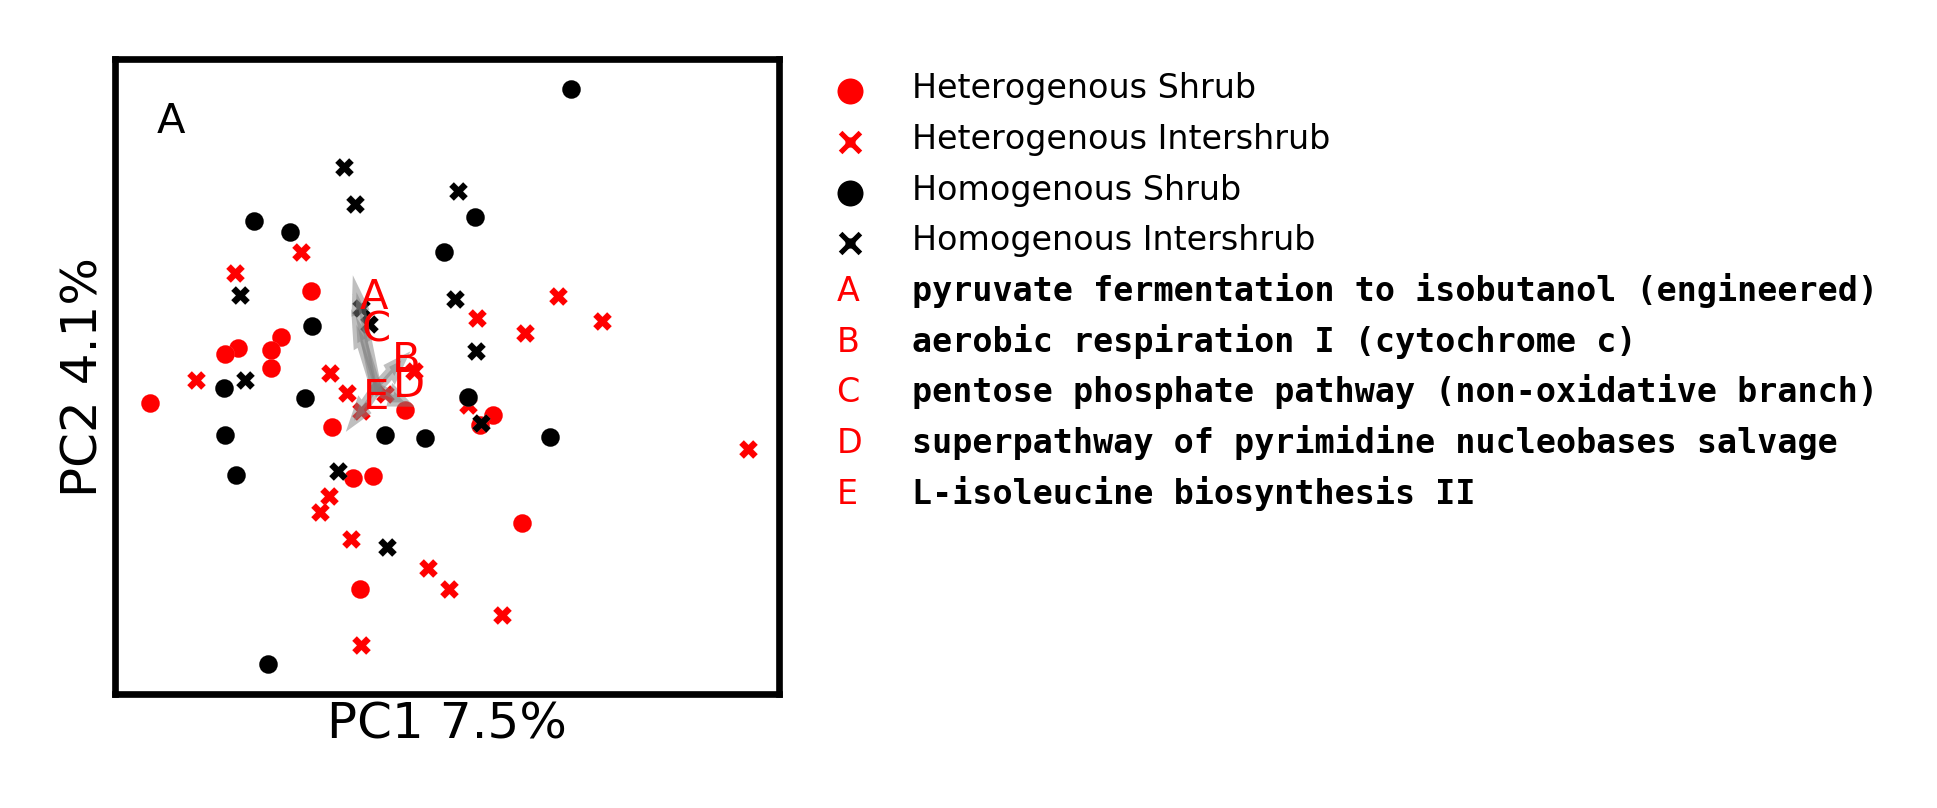

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.spatial.distance import euclidean
%matplotlib inline

def parse_biplot(qza): ### Unzipping qza biplots
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_csv(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None, sep='\t')
    biplot = pd.read_csv(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None, sep='\t')
    nan_cols = []
    for col in biplot:
        if np.isnan(biplot[col].tolist()[0]):
            nan_cols.append(col)
    if len(nan_cols) > 0:
        biplot = biplot.drop(labels=nan_cols,axis=1)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords(axis,axis2,num,biplot): ### Geting coordinats for arrows
    arrow_data = []
    origin = np.zeros_like(biplot.columns)
    biplot['importance'] = biplot.apply(euclidean, axis=1, args=(origin,))
    biplot.sort_values('importance', inplace=True, ascending=False)
    for taxon in biplot.index.tolist()[:num].copy():
        arrow_data.append([taxon,biplot.at[taxon,axis],biplot.at[taxon,axis2]])
    return arrow_data


colora = {
    'Heterogenous': 'red',
    'Homogenous': 'black',
}

marka = {
    'Shrub': 'o',
    'Intershrub': 'X'
}

def sub(ordination,metadata,ax):
    for geo in set(metadata.Geodiversity):
        for niche in set(metadata.Niche):
            color = colora[geo]
            marker = marka[niche]
            size = 5
            data = ordination.loc[
                ordination.index.isin(metadata.loc[
                    ((metadata.Niche == niche) & (metadata.Geodiversity == geo))
                ].index)
            ]
            sns.scatterplot(x=x,y=y,
                            data=data,
                            ax=ax,
                            legend=False,
                            color=color,
                            marker=marker,
                            s=size,
                            linewidth=0.01)


z=5 ### Number of features to plot

fig=plt.figure(constrained_layout=True,dpi=600,figsize=(2,1.4))
fig.set_constrained_layout_pads(w_pad=0, h_pad=0)
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.1)
axes = []
for ax in gs:
    axes.append(fig.add_subplot(ax))
    
j=0

letter = 'a'
ax_labels = ['A','B']

for marker in ['16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, sep='\t', index_col=0)
    for unifrac in ['bray_curtis']:
        qza = 'picrust/diversity/%s/%s_biplot_results.qza' % (marker,unifrac)
        ordination, biplot, Eigvals, Proportion = parse_biplot(qza)
        descriptions = pd.read_csv('picrust/%s/output/pathways_out/path_abun_unstrat_descrip.tsv.gz' % marker,index_col=0,sep='\t')
        x=1 ### axis to show
        y=2 ### axis to show
        ax = axes[j]
        j+=1
        sub(ordination,metadata,ax)
        
        ylim = ax.get_ylim()

        arrow_data = get_arrow_coords(x,y,z,biplot)
        arrow_labels_legend = {}

        
        for arrow in arrow_data:
            arrow_x,text_x = arrow[1],arrow[1]
            arrow_y, text_y = arrow[2], arrow[2]
            if arrow[2] > ylim[1]:
                arrow_y, text_y = ylim[1]-0.01, ylim[1]-0.01
            ax.arrow(0, 0, arrow_x, arrow_y, fc='gray',ec='gray',alpha=0.5)
            arrow_labels_legend[letter.upper()] = descriptions.at[arrow[0],'description']
            ax.text(text_x, text_y, letter.upper(), fontdict={'fontsize': 5, 'color':'red'})
            letter = chr(ord(letter) + 1)

        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[y-1]*100.0),fontdict={'fontsize': 6})
        ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[x-1]*100.0),fontdict={'fontsize': 6})
        ax.xaxis.set_label_coords(0.5, -0.01)
        ax.yaxis.set_label_coords(-0.01, 0.5)
        ax.autoscale(enable=True, axis='both', tight=None)
        ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=5)
        #ax.set_xlim(-0.225,0.21)

        ax = axes[j]
        j+=1
        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylim(0,1)
        ax.set_xlim(0,0.25)

        legend = sorted(list(arrow_labels_legend.items()))
        y = 0.95
        for c in colora:
            if marker=='ITS1':
                continue
            for m in marka:
                sns.scatterplot([0.03],[y],marker=marka[m],color=colora[c],ax=ax,s=15,legend=False)
                ax.text(0.1,y-0.01,"%s %s" % (c,m),fontdict={'size':4})
                y -= 0.08
        for i in legend:
            ax.text(0.015,y-0.01,i[0],fontdict={'size':4,'color':'red'})
            asv = i[1]
            ax.text(0.1,y-0.01,asv,fontdict={'size':4,'family':'monospace','weight':'semibold'})
            y -= 0.08

        for a in ['top','bottom','left','right']:
            ax.spines[a].set_visible(False)
plt.savefig('PCoA_pathways.png')

In [92]:
import pandas as pd

!mkdir picrust/diversity

for marker in ['16SrRNA']:
    
    pathways = 'picrust/%s/output/EC_metagenome_out/pred_metagenome_unstrat.tsv.gz' % marker
    pathways_biom =  'picrust/%s/output/EC_metagenome_out/pred_metagenome_unstrat.biom' % marker
    pathways_qza =  'picrust/%s/output/EC_metagenome_out/pred_metagenome_unstrat.qza' % marker
    metadata = "%s_metadata.tsv" % marker
    outdir = 'picrust/diversity/%s' % marker
    rare_tab = 'picrust/diversity/%s/rarefied_table.qza' % marker
    bc_pcoa = 'picrust/diversity/%s/bray_curtis_pcoa_results.qza' % marker
    bc_biplot = 'picrust/diversity/%s/bray_curtis_biplot_results.qza' % marker
    j_pcoa = 'picrust/diversity/%s/jaccard_pcoa_results.qza' % marker
    j_biplot = 'picrust/diversity/%s/jaccard_biplot_results.qza' % marker
    
    !biom convert \
        -i $pathways \
        -o $pathways_biom \
        --table-type="OTU table" \
        --to-hdf5
    
    !qiime tools import \
      --input-path $pathways_biom \
      --type 'FeatureTable[Frequency]' \
      --input-format BIOMV210Format \
      --output-path $pathways_qza
    
    !qiime diversity core-metrics \
      --i-table $pathways_qza \
      --p-sampling-depth 2000 \
      --m-metadata-file $metadata \
      --output-dir $outdir

    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $bc_pcoa \
      --i-features temp.qza \
      --o-biplot $bc_biplot

    !rm temp.qza
    
    !qiime feature-table relative-frequency \
     --i-table $rare_tab \
     --o-relative-frequency-table temp.qza 

    !qiime diversity pcoa-biplot \
      --i-pcoa $j_pcoa \
      --i-features temp.qza \
      --o-biplot $j_biplot

!rm temp.qza

Imported picrust/16SrRNA/output/EC_metagenome_out/pred_metagenome_unstrat.biom as BIOMV210Format to picrust/16SrRNA/output/EC_metagenome_out/pred_metagenome_unstrat.qza
Saved FeatureTable[Frequency] to: picrust/diversity/16SrRNA/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/observed_otus_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: picrust/diversity/16SrRNA/evenness_vector.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/jaccard_distance_matrix.qza
Saved DistanceMatrix to: picrust/diversity/16SrRNA/bray_curtis_distance_matrix.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/jaccard_pcoa_results.qza
Saved PCoAResults to: picrust/diversity/16SrRNA/bray_curtis_pcoa_results.qza
Saved Visualization to: picrust/diversity/16SrRNA/jaccard_emperor.qzv
Saved Visualization to: picrust/diversity/16SrRNA/bray_curtis_emperor.qzv
Saved FeatureTable[RelativeFrequency] to: t

/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
/home/amir/anaconda2/envs/SeaGrass2019/lib/python3.6/site-packages/ipykernel_launcher.py:148: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


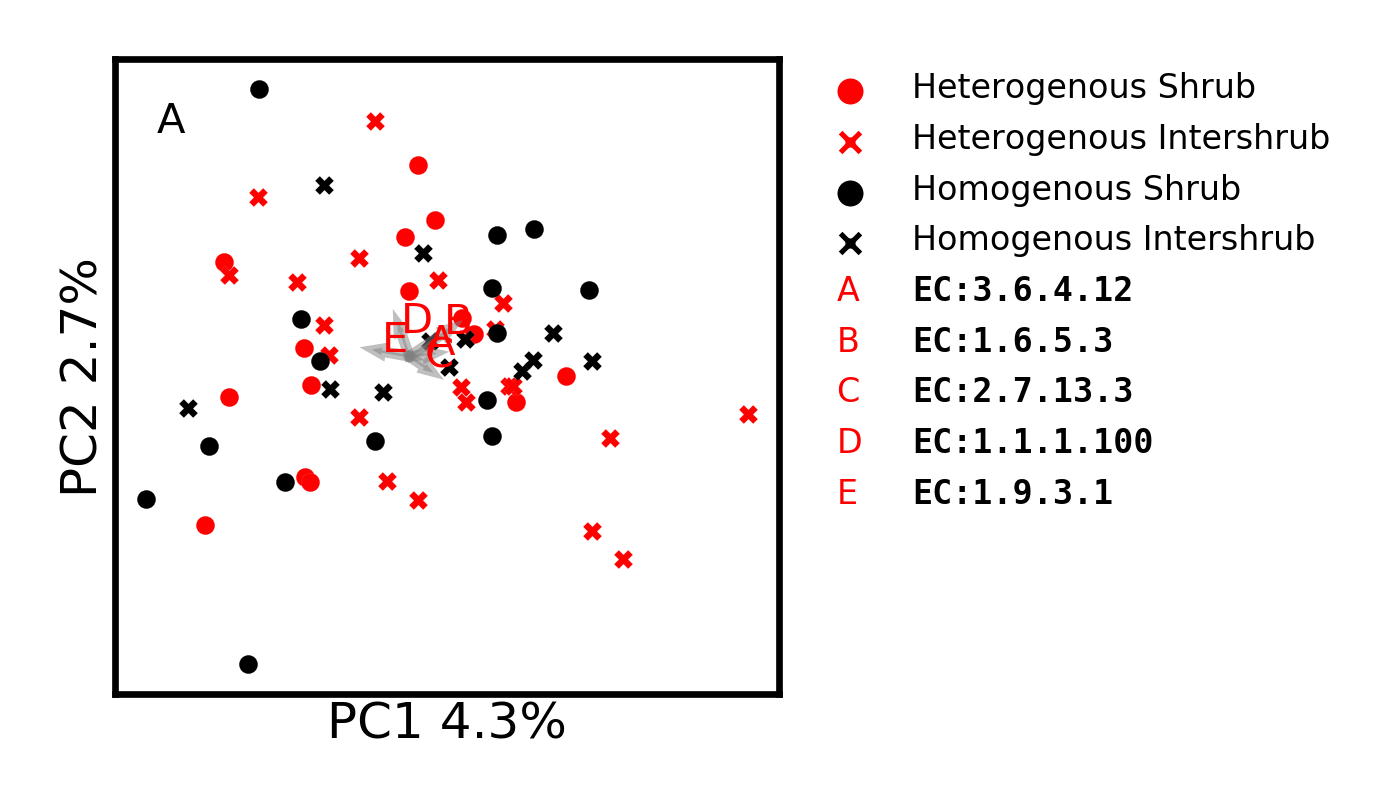

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from scipy.spatial.distance import euclidean
%matplotlib inline

def parse_biplot(qza): ### Unzipping qza biplots
    a = !unzip $qza
    digest = a[1].split('/')[0].replace('  inflating: ','')
    inf = digest + '/data/ordination.txt'
    lines = open(inf,'r').readlines()
    Eigvals = [float(i) for i in lines[1].rstrip().split('\t')]
    Proportion = [float(i) for i in lines[4].rstrip().split('\t')]
    biplot_skiprows = 7
    biplot_skipfoot = len(open(inf,'r').read().split('Site')[1].splitlines()) + 1
    pcoa_skiprows = len(open(inf,'r').read().split('Site')[0].splitlines()) + 1
    pcoa_skipfoot = 4
    pcoa = pd.read_csv(inf, index_col=0, skiprows=pcoa_skiprows, skipfooter=pcoa_skipfoot, header=None, sep='\t')
    biplot = pd.read_csv(inf, index_col=0, skiprows=biplot_skiprows, skipfooter=biplot_skipfoot, header=None, sep='\t')
    nan_cols = []
    for col in biplot:
        if np.isnan(biplot[col].tolist()[0]):
            nan_cols.append(col)
    if len(nan_cols) > 0:
        biplot = biplot.drop(labels=nan_cols,axis=1)
    !rm -r $digest
    return  pcoa, biplot, Eigvals, Proportion

def get_arrow_coords(axis,axis2,num,biplot): ### Geting coordinats for arrows
    arrow_data = []
    origin = np.zeros_like(biplot.columns)
    biplot['importance'] = biplot.apply(euclidean, axis=1, args=(origin,))
    biplot.sort_values('importance', inplace=True, ascending=False)
    for taxon in biplot.index.tolist()[:num].copy():
        arrow_data.append([taxon,biplot.at[taxon,axis],biplot.at[taxon,axis2]])
    return arrow_data


colora = {
    'Heterogenous': 'red',
    'Homogenous': 'black',
}

marka = {
    'Shrub': 'o',
    'Intershrub': 'X'
}

def sub(ordination,metadata,ax):
    for geo in set(metadata.Geodiversity):
        for niche in set(metadata.Niche):
            color = colora[geo]
            marker = marka[niche]
            size = 5
            data = ordination.loc[
                ordination.index.isin(metadata.loc[
                    ((metadata.Niche == niche) & (metadata.Geodiversity == geo))
                ].index)
            ]
            sns.scatterplot(x=x,y=y,
                            data=data,
                            ax=ax,
                            legend=False,
                            color=color,
                            marker=marker,
                            s=size,
                            linewidth=0.01)


z=5 ### Number of features to plot

fig=plt.figure(constrained_layout=True,dpi=600,figsize=(2,1.4))
fig.set_constrained_layout_pads(w_pad=0, h_pad=0)
gs = GridSpec(1, 2, width_ratios=[3, 1], wspace=0.1)
axes = []
for ax in gs:
    axes.append(fig.add_subplot(ax))
    
j=0

letter = 'a'
ax_labels = ['A','B']

for marker in ['16SrRNA']:
    metadata = pd.read_csv('%s_metadata.tsv' % marker, sep='\t', index_col=0)
    for unifrac in ['bray_curtis']:
        qza = 'picrust/diversity/%s/%s_biplot_results.qza' % (marker,unifrac)
        ordination, biplot, Eigvals, Proportion = parse_biplot(qza)
        x=1 ### axis to show
        y=2 ### axis to show
        ax = axes[j]
        j+=1
        sub(ordination,metadata,ax)
        
        ylim = ax.get_ylim()

        arrow_data = get_arrow_coords(x,y,z,biplot)
        arrow_labels_legend = {}

        
        for arrow in arrow_data:
            arrow_x,text_x = arrow[1],arrow[1]
            arrow_y, text_y = arrow[2], arrow[2]
            if arrow[2] > ylim[1]:
                arrow_y, text_y = ylim[1]-0.01, ylim[1]-0.01
            ax.arrow(0, 0, arrow_x, arrow_y, fc='gray',ec='gray',alpha=0.5)
            arrow_labels_legend[letter.upper()] = arrow[0]
            ax.text(text_x, text_y, letter.upper(), fontdict={'fontsize': 5, 'color':'red'})
            letter = chr(ord(letter) + 1)

        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylabel('PC%i %.1f%%' % (y, Proportion[y-1]*100.0),fontdict={'fontsize': 6})
        ax.set_xlabel('PC%i %.1f%%' % (x, Proportion[x-1]*100.0),fontdict={'fontsize': 6})
        ax.xaxis.set_label_coords(0.5, -0.01)
        ax.yaxis.set_label_coords(-0.01, 0.5)
        ax.autoscale(enable=True, axis='both', tight=None)
        ax.annotate(ax_labels.pop(0),xy=(0,1),xycoords="axes fraction",xytext=(5,-5),textcoords="offset points",ha="left",va="top",size=5)
        #ax.set_xlim(-0.225,0.21)

        ax = axes[j]
        j+=1
        ax.tick_params(axis='both', length=0, pad=0)       
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_ylim(0,1)
        ax.set_xlim(0,0.25)

        legend = sorted(list(arrow_labels_legend.items()))
        y = 0.95
        for c in colora:
            if marker=='ITS1':
                continue
            for m in marka:
                sns.scatterplot([0.03],[y],marker=marka[m],color=colora[c],ax=ax,s=15,legend=False)
                ax.text(0.1,y-0.01,"%s %s" % (c,m),fontdict={'size':4})
                y -= 0.08
        for i in legend:
            ax.text(0.015,y-0.01,i[0],fontdict={'size':4,'color':'red'})
            asv = i[1]
            ax.text(0.1,y-0.01,asv,fontdict={'size':4,'family':'monospace','weight':'semibold'})
            y -= 0.08

        for a in ['top','bottom','left','right']:
            ax.spines[a].set_visible(False)
plt.savefig('PCoA_KO.png')